# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [71]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件
%matplotlib inline
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

# 設定 data_path
dir_data = '../data/'

In [72]:
os.getcwd()

'C:\\Users\\gshieh\\Desktop\\GitHub\\2nd-ML100Days\\homework'

### 之前做過的處理

In [73]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [74]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [76]:
app_train["DAYS_LAST_PHONE_CHANGE"] = abs(app_train["DAYS_LAST_PHONE_CHANGE"])
age_data= app_train[["TARGET","DAYS_LAST_PHONE_CHANGE"]]

In [77]:
age_data["YEARS_LAST_PHONE_CHANGE"] = age_data["DAYS_LAST_PHONE_CHANGE"]/365

In [78]:
age_data.head()

,TARGET,DAYS_LAST_PHONE_CHANGE,YEARS_LAST_PHONE_CHANGE
0,1,1134.0,3.106849
1,0,828.0,2.268493
2,0,815.0,2.232877
3,0,617.0,1.690411
4,0,1106.0,3.030137


In [79]:
age_data["YEARS_LAST_PHONE_CHANGE"].describe()

count    307510.000000
mean          2.637969
std           2.265229
min           0.000000
25%           0.750685
50%           2.073973
75%           4.301370
max          11.758904
Name: YEARS_LAST_PHONE_CHANGE, dtype: float64

In [84]:
age_data["YEARS_BINNED"] = pd.cut(age_data["YEARS_LAST_PHONE_CHANGE"],bins=[0,2,4,6,8,10,12],
                                                      labels=["0~2","2~4","4~6","6~8","8~10","10~12"])

In [85]:
age_data["YEARS_BINNED"].value_counts()

0~2      112569
2~4       67805
4~6       60150
6~8       23485
8~10       5607
10~12       222
Name: YEARS_BINNED, dtype: int64

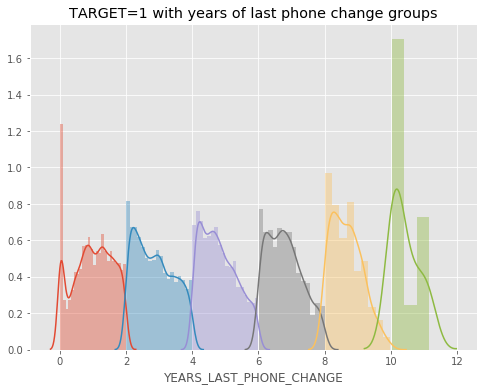

In [92]:
year_group_sorted = ["0~2","2~4","4~6","6~8","8~10","10~12"]

plt.figure(figsize=(8,6))
for i in range(len(year_group_sorted)):
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 1), 'YEARS_LAST_PHONE_CHANGE'], label = str(year_group_sorted[i]))

plt.title('TARGET=1 with years of last phone change groups')
plt.show()

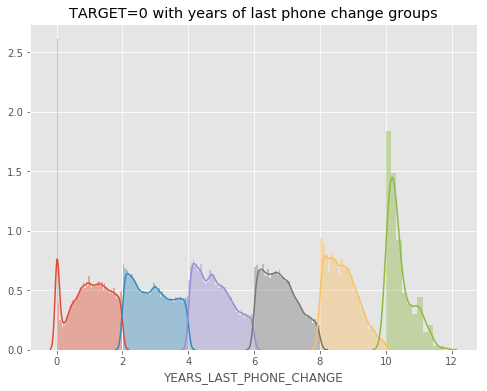

In [93]:
plt.figure(figsize=(8,6))
for i in range(len(year_group_sorted)):
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 0), 'YEARS_LAST_PHONE_CHANGE'], label = str(year_group_sorted[i]))

plt.title('TARGET=0 with years of last phone change groups')
plt.show()

In [102]:
for i in range(len(year_group_sorted)):
 print(year_group_sorted[i], ": ",age_data.loc[age_data["YEARS_BINNED"]==year_group_sorted[i],"TARGET"].mean())

0~2 :  0.09404009984986986
2~4 :  0.07738367377037092
4~6 :  0.0628761429758936
6~8 :  0.05552480306578667
8~10 :  0.04530051721062957
10~12 :  0.04954954954954955


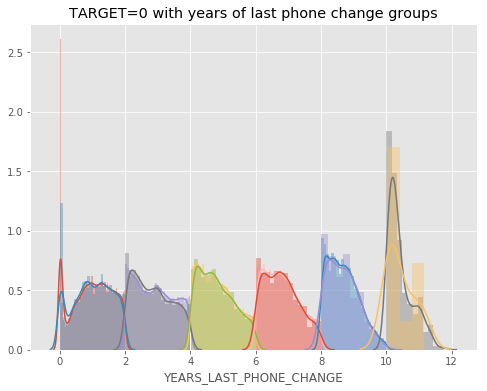

In [103]:
plt.figure(figsize=(8,6))
for i in range(len(year_group_sorted)):
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 0), 'YEARS_LAST_PHONE_CHANGE'], label = str(year_group_sorted[i]))
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
                              (age_data['TARGET'] == 1), 'YEARS_LAST_PHONE_CHANGE'], label = str(year_group_sorted[i]))
plt.title('TARGET=0 with years of last phone change groups')
plt.show()

#將之對於目標 0 或 1 進行比對 兩張圖放在一起看 很花 但上述嘗試分開放 可能會好看些